In [2]:
from sklearn.model_selection import train_test_split
from feature_engine.datasets import load_titanic
from feature_engine.outliers import Winsorizer

In [3]:
X, y = load_titanic(
    return_X_y_frame=True,
    predictors_only=True,
    handle_missing=True,
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

(X_train.head())

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
501,2,female,13.000000,0,1,19.5000,Missing,S
588,2,female,4.000000,1,1,23.0000,Missing,S
402,2,female,30.000000,1,0,13.8583,Missing,C
1193,3,male,29.881135,0,0,7.7250,Missing,Q
686,3,female,22.000000,0,0,7.7250,Missing,Q


<Axes: ylabel='Density'>

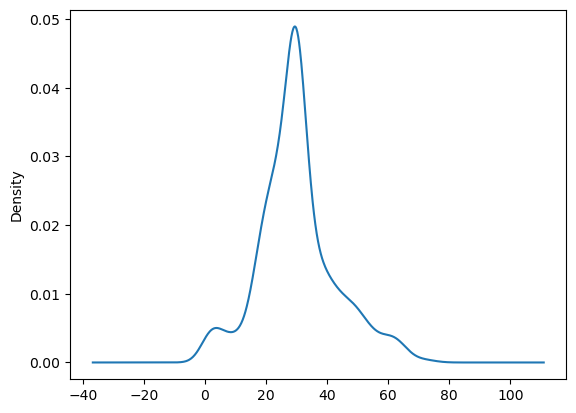

In [4]:
X_train['age'].plot.kde()

<Axes: ylabel='Density'>

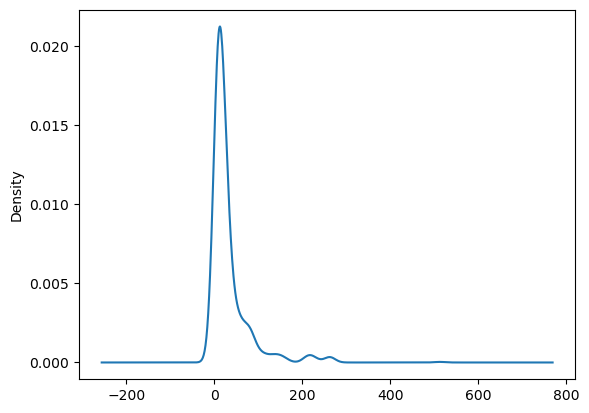

In [5]:
X_train['fare'].plot.kde()

In [6]:
capper = Winsorizer(capping_method='gaussian',
                    tail='right',
                    fold=3,
                    variables=['age', 'fare'])

capper.fit(X_train)

Winsorizer(fold=3, variables=['age', 'fare'])

In [7]:
X_train.describe()

,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,916.000000,916.000000,916.000000
mean,2.292576,30.164518,0.532751,0.371179,32.532050
std,0.842576,12.531840,1.125957,0.837508,47.416524
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,74.000000,8.000000,9.000000,512.329200


In [8]:
capper.right_tail_caps_

{'age': 67.73951212364803, 'fare': 174.70395336846678}

In [9]:
# transform the data
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

In [10]:
train_t.describe()

,pclass,age,sibsp,parch,fare
count,916.000000,916.000000,916.000000,916.000000,916.000000
mean,2.292576,30.151110,0.532751,0.371179,30.519944
std,0.842576,12.489010,1.125957,0.837508,37.872409
min,1.000000,0.166700,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,67.739512,8.000000,9.000000,174.703953


In [11]:
X_train[['fare', 'age']].max()

fare    512.3292
age      74.0000
dtype: float64

In [12]:
train_t[['fare', 'age']].max()

fare    174.703953
age      67.739512
dtype: float64

In [13]:
X_train.shape

(916, 8)

In [14]:
train_t.shape

(916, 8)